In [3]:
import json
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict


In [4]:
output_file = '../data/cadec/output.json'
gt_file = '../data/cadec/test.json'
train_file = '../data/cadec/train.json'

In [5]:
with open(output_file,'r') as fp:
    output = json.load(fp)
with open(gt_file, 'r') as fp:
    gt = json.load(fp)
with open(train_file, 'r') as fp:
    train = json.load(fp)

In [9]:
do_no_find = [] # in the groundtruth, but the model did not detect out
miss_classification = [] # not in the groundtruth, but the model detected out

error_sentence_dict = {}

output_list = []
gt_list = []

for sentence_idx in range(len(output)):
    output_sent = output[sentence_idx]
    output_entities = output_sent['entity']
    output_entity_set = []
    for entity in output_entities:
        output_entity_set.append(entity['text'])
    
    gt_sent = gt[sentence_idx]
    gt_entities = gt_sent['ner']
    gt_entity_set = []
    sentence = gt_sent['sentence']
    for entity in gt_entities:
        tokens = [sentence[i] for i in entity['index']]
        gt_entity_set.append(tokens)

    #compare
    for entity in output_entity_set:
        output_list.append(entity)
        if entity not in gt_entity_set:
            miss_classification.append(entity)
            # error_sentence_dict[entity] = sentence_idx
    
    for entity in gt_entity_set:
        gt_list.append(entity)
        if entity not in output_entity_set:
            do_no_find.append(entity)
            # error_sentence_dict[entity] = sentence_idx

all_error_cases = do_no_find + miss_classification
print("do no find:", len(do_no_find))
print("miss classification:", len(miss_classification))
print("total:", len(all_error_cases))

do no find: 282
miss classification: 236
total: 518


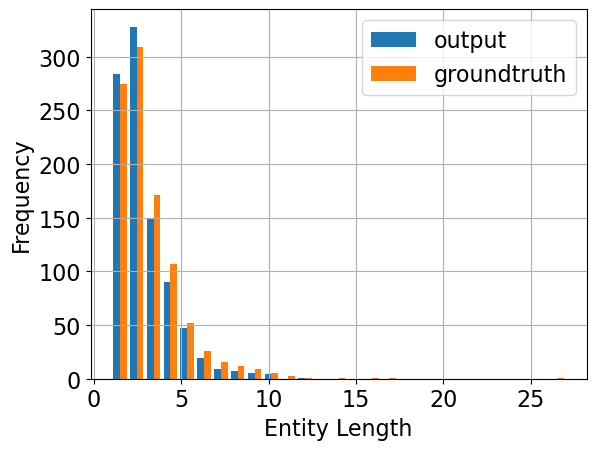

In [64]:
output_list_length = [len(entity) for entity in output_list]
gt_list_length = [len(entity) for entity in gt_list]
matplotlib.rcParams.update({'font.size': 16})
plt.hist([output_list_length, gt_list_length], bins=27, label=['output', 'groundtruth'])
plt.legend()
plt.grid()
plt.xlabel("Entity Length")
plt.ylabel("Frequency")
plt.show()

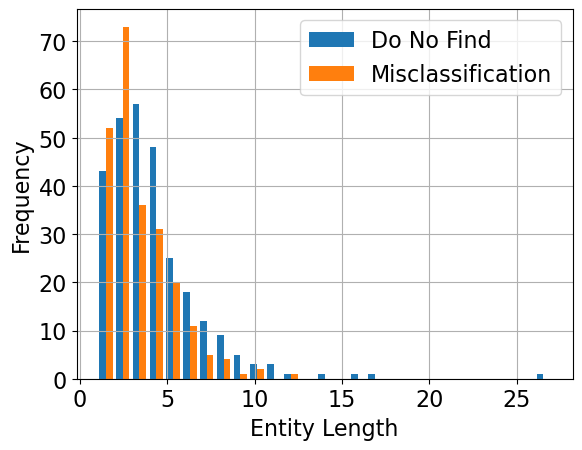

In [67]:
# length problem - extremly short or extremly long
do_no_find_length = [len(entity) for entity in do_no_find]
miss_classification_length = [len(entity) for entity in miss_classification]
matplotlib.rcParams.update({'font.size': 16})
plt.hist([do_no_find_length, miss_classification_length], bins=27, label=['Do No Find', 'Misclassification'])
plt.legend()
plt.grid()
plt.xlabel("Entity Length")
plt.ylabel("Frequency")
plt.show()

In [36]:
# type problem - nested and discontinuous



In [ ]:
# containing the words such as not and hard(否定词语)

In [38]:
do_no_find

[['could', 'not', 'sleep', 'well'],
 ['gas'],
 ['drowsy'],
 ['pain', 'neck'],
 ['muscles', 'pain'],
 ['hard', 'to', 'get', 'up', 'in', 'the', 'AM'],
 ['hard', 'to', 'stay', 'awake'],
 ['degenerative', 'back', 'disease'],
 ['unable', 'to', 'focus'],
 ['want', 'to', 'give', 'up'],
 ['not',
  'able',
  'to',
  'remember',
  'things',
  'like',
  'whether',
  'I',
  'had',
  'done',
  'something',
  'or',
  'where',
  'I',
  'had',
  'placed',
  'something'],
 ['crave', 'sweets'],
 ['crave', 'carbohydrates'],
 ['bouts', 'of', 'diverticulitis'],
 ['bleeding', 'inside'],
 ['cramp'],
 ["'", 'scared', "'", 'feeling'],
 ['charlie', 'horse', 'in', 'feet'],
 ['Severe', 'hip', '&', 'feet', 'pain'],
 ['hardly', 'walk'],
 ['tendonitis', 'in', 'elbows'],
 ['pain'],
 ['sore'],
 ['painful'],
 ['can', 'hardly', 'sleep'],
 ['tingly'],
 ['constipation'],
 ['painful'],
 ['intense', 'chills', 'and', 'shivers'],
 ['lost', '30', 'pounds'],
 ['little', 'pain'],
 ['couldn', "'", 't', 'lift', 'my', 'arms', 'or',

In [33]:
len(miss_classification)

282

In [27]:
output_entity_set

[['decreased', 'cognitive', 'skills'], ['Brain', 'fog']]

In [28]:
gt_entity_set

[['Brain', 'fog'], ['decreased', 'cognitive', 'skills']]

In [22]:
train_list = []
for sentence_idx in range(len(train)):
    train_sent = train[sentence_idx]
    train_entities = train_sent['ner']
    train_entity_set = []
    sentence = train_sent['sentence']
    for entity in train_entities:
        tokens = [sentence[i] for i in entity['index']]
        train_list.append(tokens)


In [24]:
# the error semantics(negative)
negative_words = ["unable","not","no"]

# the negative word distribution in the groundtruth(for the entity dimension)
cnt_neg = 0
for entity in train_list:
    for word in entity:
        if word in negative_words:
            cnt_neg += 1
            break
print("The total entity number: ", len(train_list), "," , cnt_neg, "of them have negative words")

cnt_neg = 0
for entity in output_list:
    for word in entity:
        if word in negative_words:
            cnt_neg += 1
            break
print("The total entity number: ", len(output_list), "," , cnt_neg, "of them have negative words")

# near the same, not the typical error

The total entity number:  4428 , 69 of them have negative words
The total entity number:  944 , 13 of them have negative words


In [29]:
gt[0]

{'sentence': ['Brain', 'fog', 'and', 'decreased', 'cognitive', 'skills', '.'],
 'ner': [{'index': [0, 1], 'type': 'ADR'},
  {'index': [3, 4, 5], 'type': 'ADR'}]}

In [7]:
# overlapped entities and discontinuous entities

# discontinuous entities
# l is the index list
def isDiscontinuous(l):
    lastIndex = l[0]
    for idx in range(1, len(l)):
        if l[idx] != (lastIndex + 1):
            return True
        lastIndex = l[idx]

# ner_list is the ner map in the groundtruth
def overlapCount(ner_list):
    position_set = [0 for i in range(200)]
    overlap_cnt = 0
    for ner in ner_list:
        ner_index = ner['index']
        for idx in ner_index:
            if position_set[idx] == 0:
                position_set[idx] = 1
            else:
                overlap_cnt += 1
                break
    return overlap_cnt

# ner: the list of index for an entity
# ner_list: the list of above (list + type)
# check whether ner is an overlapped ner in the ner_list
def isOverlap(target_ner, ner_list):
    position_set = [0 for i in range(200)]
    for ner in ner_list:
        if target_ner == ner['index']:
            continue
        else:
            ner_index = ner['index']
            for idx in ner_index:
                position_set[idx] = 1
    for idx in target_ner:
        if position_set[idx] == 1:
            return True
    return False

# given the sentence and entity text
# get the list of the entity index
# return all the possible index
def findPossibleEntityIndex(sentence, text):
    # import pdb;pdb.set_trace()
    text_length = len(text)
    word_index = [[] for i in range(text_length)]
    for idx in range(text_length):
        word = text[idx]
        tmp_sentence = sentence
        tmp_sentence_begin = 0
        while tmp_sentence.count(word)!=0:
            tmp_idx = tmp_sentence.index(word)
            word_index[idx].append(tmp_idx + tmp_sentence_begin)
            tmp_sentence_begin += (tmp_idx + 1)
            tmp_sentence = tmp_sentence[tmp_idx + 1:]
    # print(word_index)
    combinations = [[]]
    for idx in range(text_length):
        length_previous_combinations = len(combinations)
        tmp_combinations = []
        for previous_combination in combinations:
            for possible_idx in word_index[idx]:
                if previous_combination == [] or possible_idx > previous_combination[-1]:
                    tmp_combinations.append(previous_combination + [possible_idx])
                    # combinations.append(previous_combination + [possible_idx])
        combinations = tmp_combinations
        # print(combinations)

    return combinations



discontinuous_entity_sentence = defaultdict(list)
for sentence_idx in range(len(gt)):
    sentence = gt[sentence_idx]['sentence']
    ners = gt[sentence_idx]['ner']
    for ner in ners:
        if isDiscontinuous(ner['index']):
            discontinuous_entity_sentence[sentence_idx].append(ner['index'])

In [9]:
# entity type distribution

def reportTypeDistribution(data):
    total_entity_cnt = 0
    overlapped_entity_cnt = 0
    discontinuous_entity_cnt = 0

    for sentence_idx in range(len(data)):
        ner_list = data[sentence_idx]['ner']
        total_entity_cnt += len(ner_list)
        discontinuous_entity_cnt_tmp = 0
        overlapped_entity_cnt_tmp = 0
        for ner in ner_list:
            # print(ner)
            if isDiscontinuous(ner['index']):
                discontinuous_entity_cnt_tmp += 1

            if isOverlap(ner['index'], ner_list):
                overlapped_entity_cnt_tmp += 1

        overlapped_entity_cnt += overlapped_entity_cnt_tmp
        discontinuous_entity_cnt += discontinuous_entity_cnt_tmp

        # if overlapped_entity_cnt_tmp != 0 and discontinuous_entity_cnt_tmp != 0:
            # print(data[sentence_idx])

    print("total entity:", total_entity_cnt, "overlapped:", overlapped_entity_cnt, "discontinuous:", discontinuous_entity_cnt)

In [10]:
reportTypeDistribution(train)
reportTypeDistribution(gt)

total entity: 4428 overlapped: 661 discontinuous: 491
total entity: 990 overlapped: 131 discontinuous: 94


In [13]:
output[0]

{'sentence': ['Brain', 'fog', 'and', 'decreased', 'cognitive', 'skills', '.'],
 'entity': [{'text': ['decreased', 'cognitive', 'skills'], 'type': 'adr'},
  {'text': ['Brain', 'fog'], 'type': 'adr'}]}

In [55]:
sentence = output[24]['sentence']
entities = output[24]['entity']

In [56]:
print(sentence)

['Severe', 'back', 'pain', 'muscles', 'pain', 'loss', 'of', 'energy', ',', 'depression', '.']


In [57]:
print(entities)

[{'text': ['Severe', 'back', 'pain'], 'type': 'adr'}, {'text': ['depression'], 'type': 'adr'}, {'text': ['pain', 'loss', 'of', 'energy'], 'type': 'adr'}, {'text': ['loss', 'of', 'energy'], 'type': 'adr'}]


In [58]:
findPossibleEntityIndex(sentence, entities[0]['text'])

[[0, 1, 2], [0, 1, 4]]

In [60]:
# now report on the model performance on each different entity type
# precision
total_overlap = 0
total_discontinuous = 0

for sentence_idx in range(len(gt)):
    
# for sentence_idx in range(len(output)):
#     sentence = output[sentence_idx]['sentence']
#     entities = output[sentence_idx]['entity']
#     for entity in entities:
#         entity_text = entity['text']
#         entity_index_lists = findPossibleEntityIndex(sentence, entity_text)
#         # any one in the entity_index_lists matched with the groundtruth should be considered valid
#         if len(entity_index_lists)!=1:
#             print(sentence_idx)
#             print(entity_text)
#             print(entity_index_lists)

24
['Severe', 'back', 'pain']
[[0, 1, 2], [0, 1, 4]]
24
['pain', 'loss', 'of', 'energy']
[[2, 5, 6, 7], [4, 5, 6, 7]]
28
['loss', 'of', 'balance']
[[1, 37, 38], [36, 37, 38]]
28
['memory', 'loss']
[[0, 1], [0, 36]]
28
['severe', 'shoulder', 'pain']
[[6, 7, 10], [6, 7, 32]]
28
['knee', 'pain']
[[9, 10], [9, 32]]
83
['intense', 'chills']
[[2, 14], [13, 14]]
130
['muscle', 'pain', 'in', 'back']
[[117, 136, 137, 138], [135, 136, 137, 138]]
138
['abdominal', 'pain']
[[6, 7], [6, 10], [6, 27]]
159
['unable', 'to', 'sleep']
[[0, 1, 16], [0, 15, 16], [14, 15, 16]]
186
['migranes']
[[3], [5]]
186
['ocular', 'migranes']
[[2, 3], [2, 5]]
313
['stomach', 'problems']
[[3, 4], [3, 11]]
339
['pain']
[[10], [33]]
339
['pain']
[[10], [33]]
348
['diarrhea']
[[1], [26]]
348
['diarrhea']
[[1], [26]]
352
['pain']
[[4], [26]]
388
['Joint', 'pain']
[[0, 1], [0, 6], [0, 9]]
388
['shoulder', 'pain']
[[5, 6], [5, 9]]
388
['back', 'pain']
[[3, 6], [3, 9]]
412
['severe', 'leg', 'muscle', 'weakness']
[[8, 9, 10, 1